In [1]:
%matplotlib inline

In [2]:
from kid_readout.measurement.io import nc

In [3]:
ncf = nc.NCFile('/data/detectors/2016-06-10_203047_sweep_stream.nc')

In [4]:
print(ncf.metadata.script_code)

"""
Measure one resonator per LO frequency. Since each measurement has only one channel, record SingleSweepStreams.
"""
import time

import numpy as np
try:
    from tqdm import tqdm as progress
except ImportError:
    progress = list

from kid_readout.roach import hardware_tools, analog
from kid_readout.measurement import acquire, basic
from kid_readout.equipment import hardware
from kid_readout.settings import CRYOSTAT
if CRYOSTAT.lower() == 'hpd':
    from kid_readout.equipment import hpd_temps as temps
elif CRYOSTAT.lower() == 'starcryo':
    from kid_readout.equipment import starcryo_temps as temps
else:
    raise ValueError("Unknown cryostat: {}".format(repr(CRYOSTAT)))

# Parameters
f0_MHz = np.array([2432, 3488, 3629, 3800])
num_offsets = 100
span_MHz = 10
minimum_MHz = 10
round_to_MHz = 2
lo_MHz = round_to_MHz * np.round((f0_MHz - span_MHz / 2 - minimum_MHz) / round_to_MHz)
offsets_MHz = np.linspace(minimum_MHz, minimum_MHz + span_MHz, num_offsets)
num_tone_samples = 2**19
swe

In [5]:
ss = [ncf.read(name) for name in ncf.node_names()]

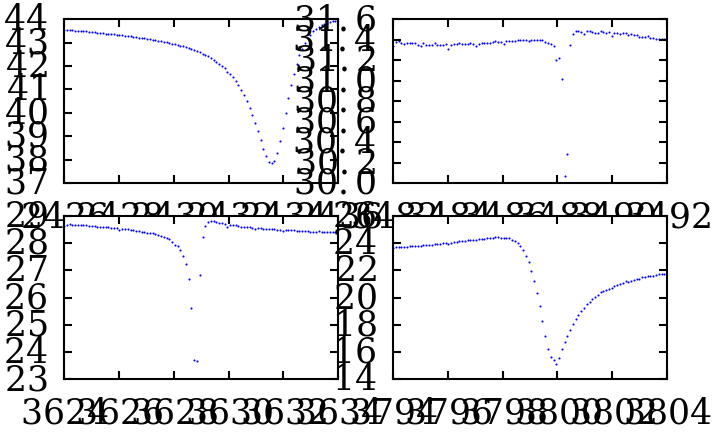

In [6]:
fig, axes = plt.subplots(2, 2)
for s, ax in zip(ss, axes.flatten()):
    ax.plot(s.sweep.frequency_MHz, 20 * np.log10(np.abs(s.sweep.s21_point)), '.b', markersize=1)

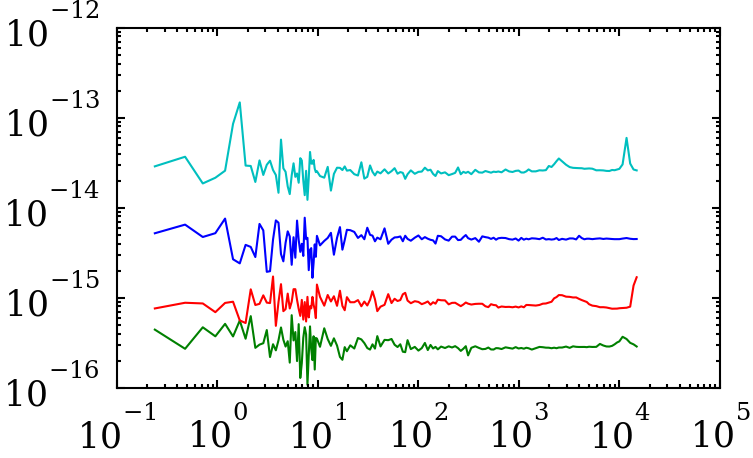

In [7]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')

for s in ss:
    ax.plot(s.S_frequency, s.S_xx)